## <h2 style="color:Red; text-align:center;"> Traffic Signs Classification <h2>

#### <h4 style="color:blue; "> Problem Statement <h4>


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/UK_traffic_sign_543.svg"
         alt="Real Mona Lisa"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Traffic Sign Classification-
  </td></tr>
</table>

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images.
- Classes are as listed below:
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
- The network used is called LeNet that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [52]:
# Creating the dictonaty for the above classes
traffic_signs = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons',
}


## <h2 style="color:#F149; "> <strong>Model 1 : LeNet CNN <h2>


#### <h4 style="color:blue; ">Environment setup<h4>

In [53]:
# Import enviromennts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [54]:
%matplotlib inline

#### <h4 style="color:blue; "> LeNet CNN architecture <h4>

LeNet is a pioneering convolutional neural network (CNN) architecture developed by Yann LeCun and his collaborators in the late 1980s and early 1990s. It was one of the first CNNs to demonstrate the power of deep learning in computer vision tasks, particularly `handwritten digit recognition`. LeNet-5, the most well-known version, consists of the following layers:

<img src="https://miro.medium.com/v2/resize:fit:1400/1*4Z6p3uo07w4GcZ_3QSmwPA.png">

**`Output Size`**= [(**Stride Input Size**−**Filter Size**+2 × **Padding**)/**stride** ] +1

In LeNet-5, the specifics for the first convolutional layer (C1) are:

`Input Size:` 32 (the input image is 32x32 pixels)
<br>`Filter (Kernel) Size:` 5 (the convolutional filters are 5x5 pixels)
<br>`Padding:` 0 (LeNet-5 does not use padding in the first convolutional layer)
<br>`Stride:` 1 (the filters move one pixel at a time)
<br>Applying these values to the formula:

**Output Size =(32−5+2×0)/1+1=28**


#### <h4 style="color:blue; "> Import Dataset  and Create Train,Test and Validation sets<h4>

In [55]:
import pickle

In [56]:
# Create Training set
with open("./traffic-signs-data/traffic-signs-data/train.p",mode="rb") as train:
    train=pickle.load(train)

In [57]:
X_train,y_train=train["features"],train["labels"]

In [58]:
X_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

In [59]:
# Create validation set
with open("./traffic-signs-data/traffic-signs-data/valid.p",mode="rb") as valid:
   valid=pickle.load(valid)

In [60]:
X_valid,y_valid=valid["features"],valid["labels"]

In [61]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [62]:
# Create test set
with open("./traffic-signs-data/traffic-signs-data/test.p",mode="rb") as test:
   test=pickle.load(test)

In [63]:
X_test,y_test=test["features"],test["labels"]

In [64]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

#### <h4 style="color:blue; "> Visulaize the Data <h4>

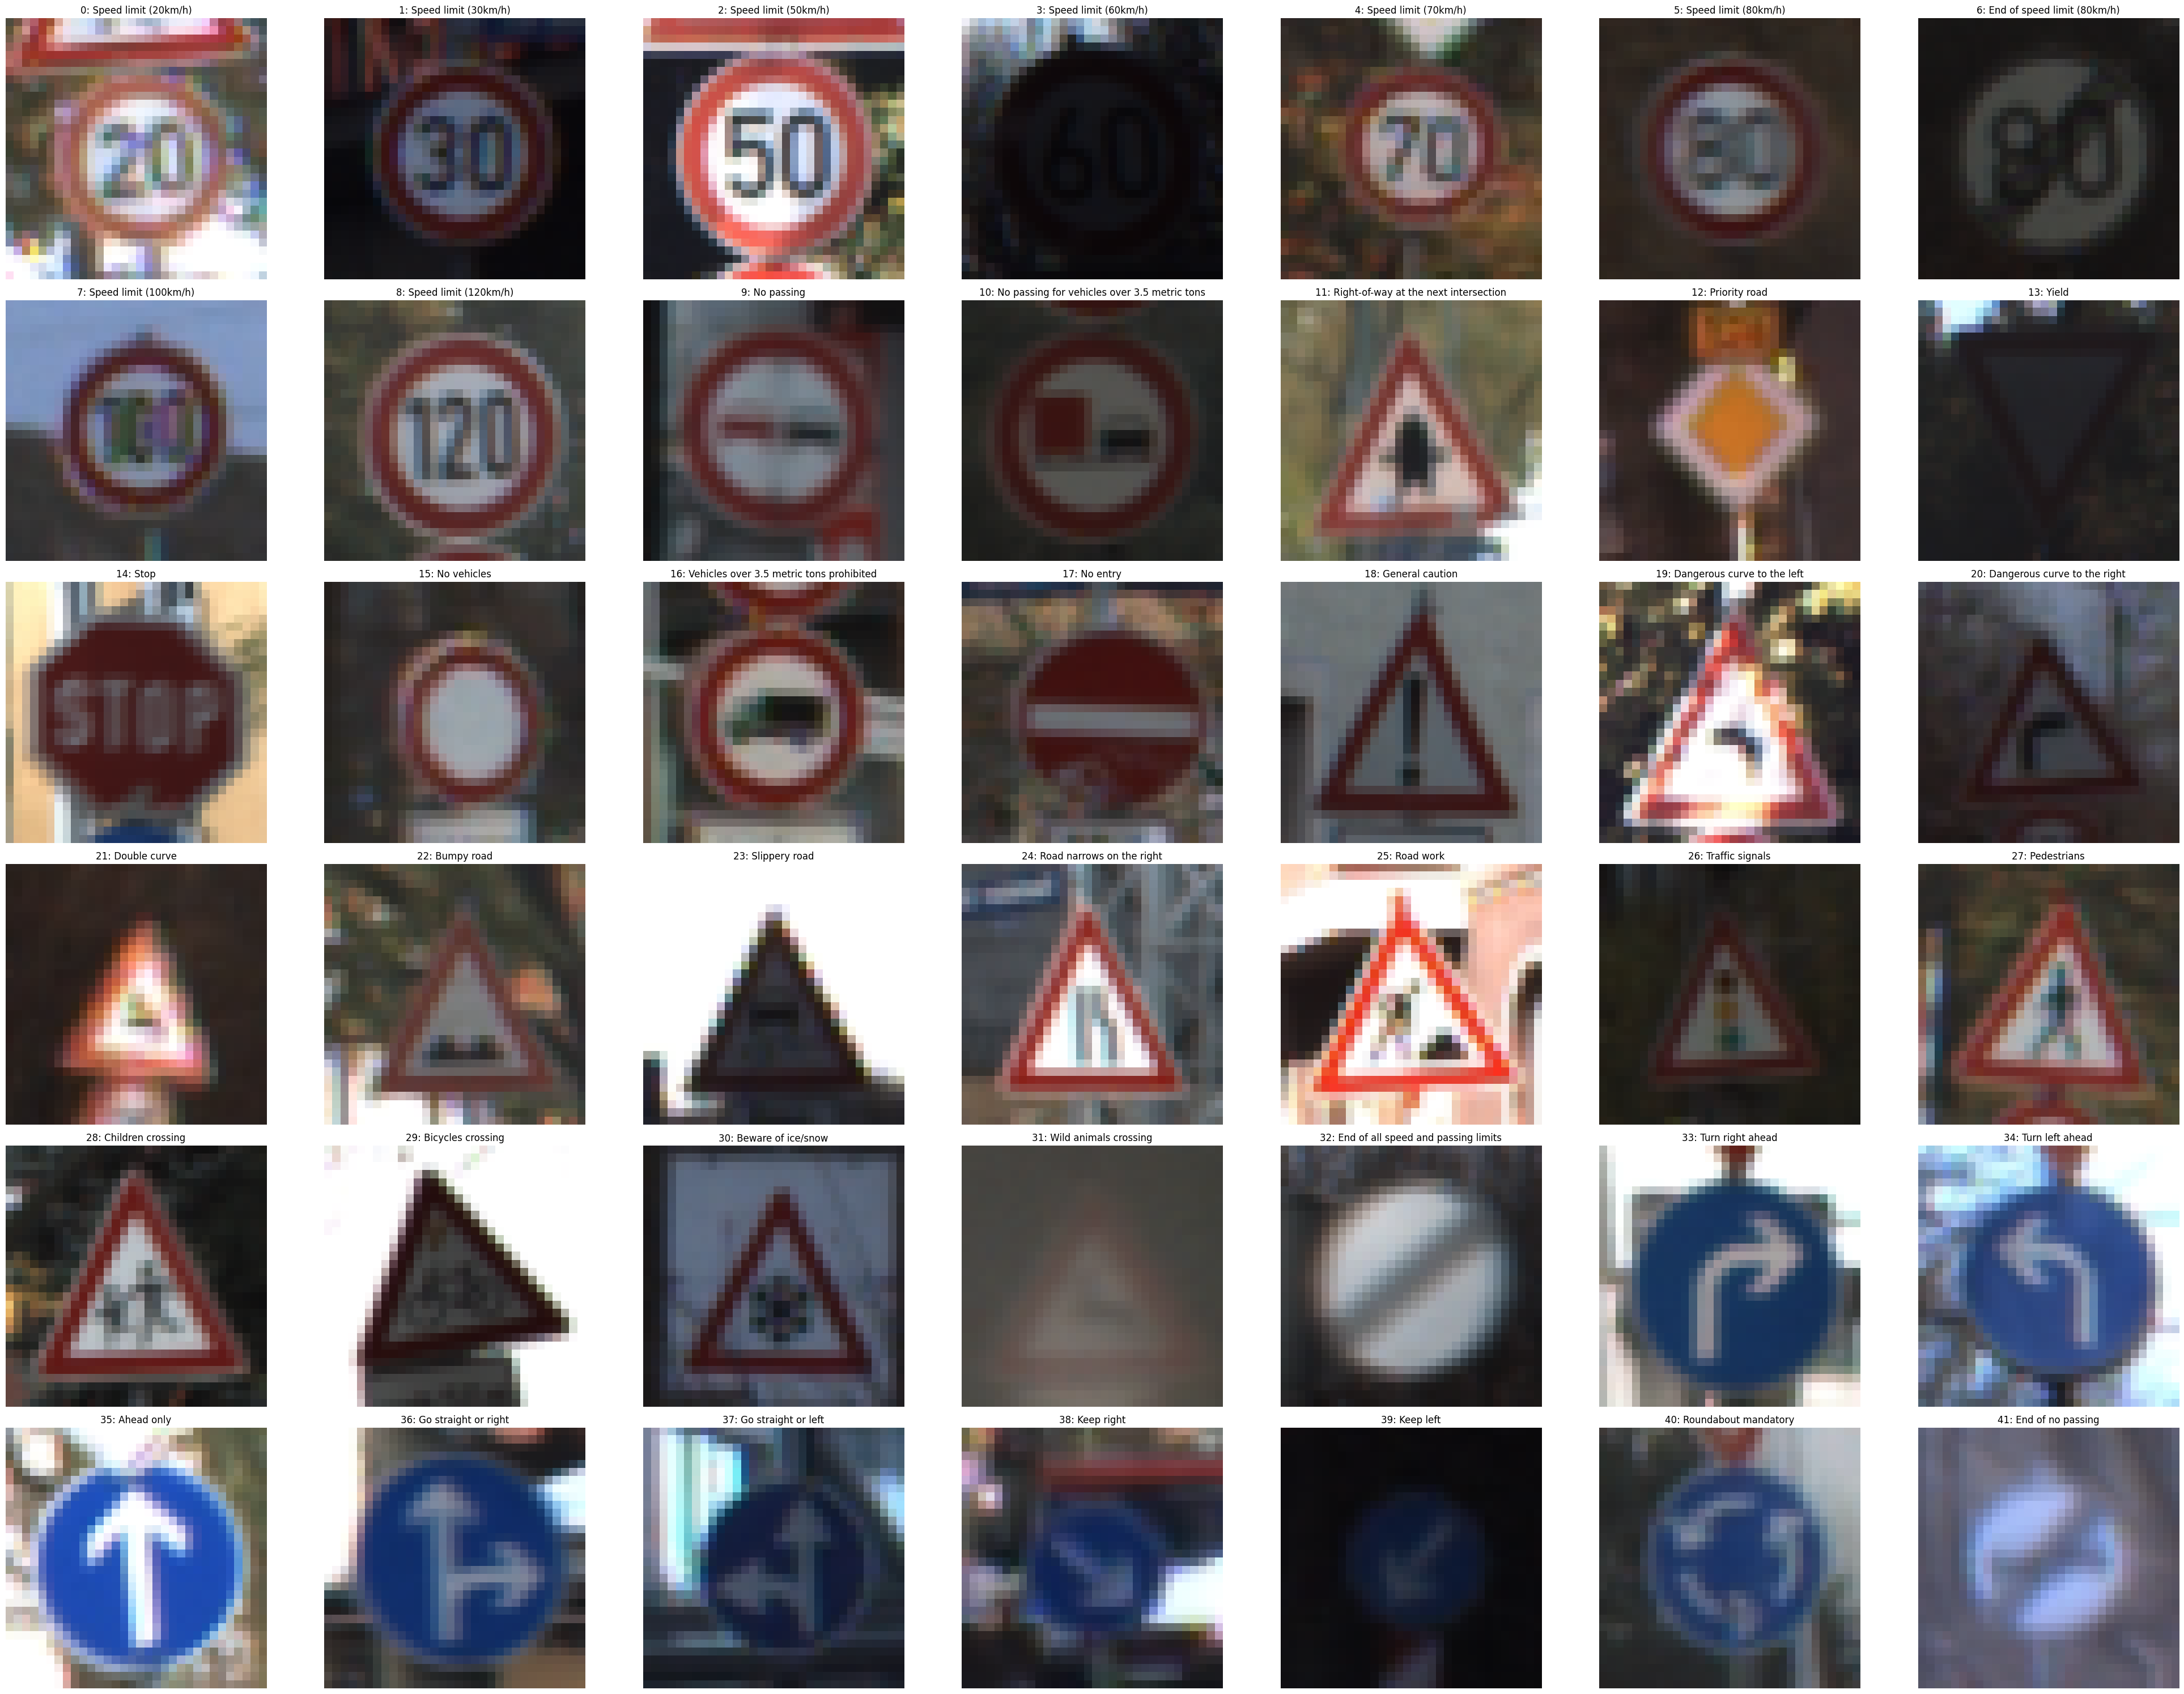

In [65]:
import random
import matplotlib.pyplot as plt


# Create subplots with 6 rows and 7 columns for 42 images (one from each class)
fig, axes = plt.subplots(6, 7, figsize=(40, 30))

# Loop through each class and plot one image from each class
for i in range(42):
    # Find one random image index for each class 'i'
    class_indices = [index for index, label in enumerate(y_train) if label == i]
    random_index = random.choice(class_indices)  # Randomly select one image from class 'i'

    # Plot the selected image
    axes[i // 7, i % 7].imshow(X_train[random_index])  # Plot the image
    axes[i // 7, i % 7].set_title(f"{i}: {traffic_signs[i]}")  # Title with class label
    axes[i // 7, i % 7].axis("off")  # Remove axis for better visualization

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()



#### <h4 style="color:blue; "> Data Preparation <h4>

In [66]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [67]:
# Convert from coloured image to gray ((32,32,3) to (32,32,1))
X_train_gray = np.mean(X_train, axis=3, keepdims=True)
X_valid_gray = np.mean(X_valid, axis=3, keepdims=True)
X_test_gray  = np.mean(X_test, axis=3, keepdims=True)


In [68]:
# X_train

In [69]:
# X_train_gray

In [70]:
X_train_gray.shape,X_valid_gray.shape,X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [71]:
# Normalizing the data ( 0,255) to  (-1,1)
X_train_gray = (X_train_gray-128)/128
X_valid_gray = (X_valid_gray-128)/128
X_test_gray  = (X_test_gray-128)/128


In [72]:
# X_train_gray

In [73]:
X_train_gray.shape,X_valid_gray.shape,X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

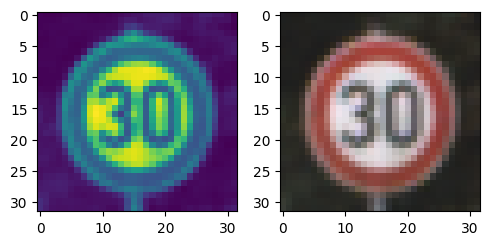

In [74]:

# Create Sub plots
fig,axes=plt.subplots(1,2,figsize=(5,5))

# Plot gray vs coloured images
axes[0].imshow(X_valid_gray[500])
axes[1].imshow(X_valid[500])
plt.tight_layout()


We can see from the above images that the gray scale does retain the important features

#### <h4 style="color:blue; "> Model building <h4>

The model consists of the following layers:

- **STEP 1**: `THE FIRST CONVOLUTIONAL LAYER #1`
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- **STEP 2**: `THE SECOND CONVOLUTIONAL LAYER #2`
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- **STEP 3**: `FLATTENING THE NETWORK`
    - Flatten the network with Input = 5x5x16 and Output = 400

- **STEP 4**: `FULLY CONNECTED LAYER`
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- **STEP 5**: `ANOTHER FULLY CONNECTED LAYER`
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- **STEP 6**: `FULLY CONNECTED LAYER`
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [75]:
from tensorflow.keras import datasets,layers,models

LeNet=models.Sequential()

# Adding 1st Conv and 1st Pooling
LeNet.add(layers.Conv2D(6,(5,5),activation="relu",input_shape=(32,32,1)))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2)))

# Adding 2nd Conv and 2nd Pooling
LeNet.add(layers.Conv2D(16,(5,5),activation="relu"))
LeNet.add(layers.AveragePooling2D(pool_size=(2,2)))

# Flatten
LeNet.add(layers.Flatten())

# Add Fully connected Dense layer with 120 neurons
LeNet.add(layers.Dense(units=120,activation="relu"))

# Add 2nd Fully connected Dense layer with 84 neurons
LeNet.add(layers.Dense(units=84,activation="relu"))

# Add output layer with 43 neurons
LeNet.add(layers.Dense(units=43,activation="softmax"))




In [76]:
LeNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(learning_rate=0.001)

In [78]:
LeNet.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

In [80]:
history=LeNet.fit(X_train_gray,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(X_valid_gray,y_valid),callbacks=[early_stop])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0952 - loss: 3.4657 - val_accuracy: 0.3336 - val_loss: 2.5410
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4744 - loss: 1.9514 - val_accuracy: 0.6111 - val_loss: 1.3350
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7108 - loss: 1.0095 - val_accuracy: 0.7068 - val_loss: 0.9604
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8121 - loss: 0.6818 - val_accuracy: 0.7562 - val_loss: 0.8187
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8481 - loss: 0.5477 - val_accuracy: 0.7914 - val_loss: 0.7032
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8801 - loss: 0.4483 - val_accuracy: 0.8154 - val_loss: 0.6558
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8945 - loss: 0.3924 - val_accuracy: 0.8270 - val_loss: 0.6097
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9096 - loss: 0.3403 - val_accuracy: 0.8240 - v

In [81]:
loss1,accuracy1=LeNet.evaluate(X_test_gray,y_test)
loss1,accuracy1

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8678 - loss: 0.7557


(0.7801870107650757, 0.8650831580162048)

In [82]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, ' Training Accuracy vs Validation Accuracy')

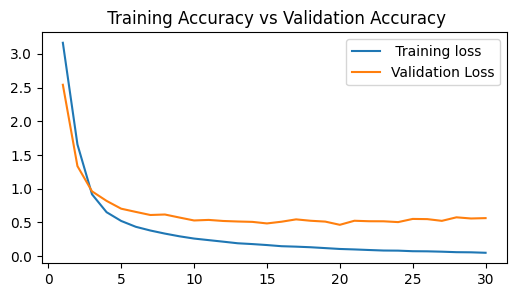

In [109]:
# plot accuracy vs validation accuracy
plt.figure(figsize=(6,3))
epochs=range(1,len(history.history["accuracy"])+1)
plt.plot(epochs,history.history['loss'],label=" Training loss")

plt.plot(epochs,history.history[ 'val_loss'],label="Validation Loss")
plt.legend()
plt.title(" Training Accuracy vs Validation Accuracy")

---
**Inference**

---
- `Training loss:`decreased gradually at first and stabilized in the later as it has learned most of what it can learn
- `Validation loss:`decreased gradually at the start and after that it follows the zig zag pattern .The model isnt generalizing well on unseen data
- The model is overfitting as it performs well on the training set but non on validation set
- The validation and training loss has not converged  and the gap between them is high indicating overfiting and the improbements in the model

#### <h4 style="color:blue; "> Prediction <h4>

In [84]:
# Predicted classes
pred=LeNet.predict(X_test_gray)


pred_classes = np.argmax(pred, axis=1)
pred_classes

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([16,  1, 38, ...,  3,  7,  4], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix,classification_report
labels=[i for i in range(0,43)]
classes=[traffic_signs[i] for i in labels]
classes

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [86]:
cm=confusion_matrix(y_test,pred_classes)
print(cm)

[[ 30  24   0 ...   0   0   0]
 [  2 667  35 ...   1   1   0]
 [  0  40 684 ...   0   0   0]
 ...
 [  0   0   0 ...  52   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   6  80]]


<Axes: >

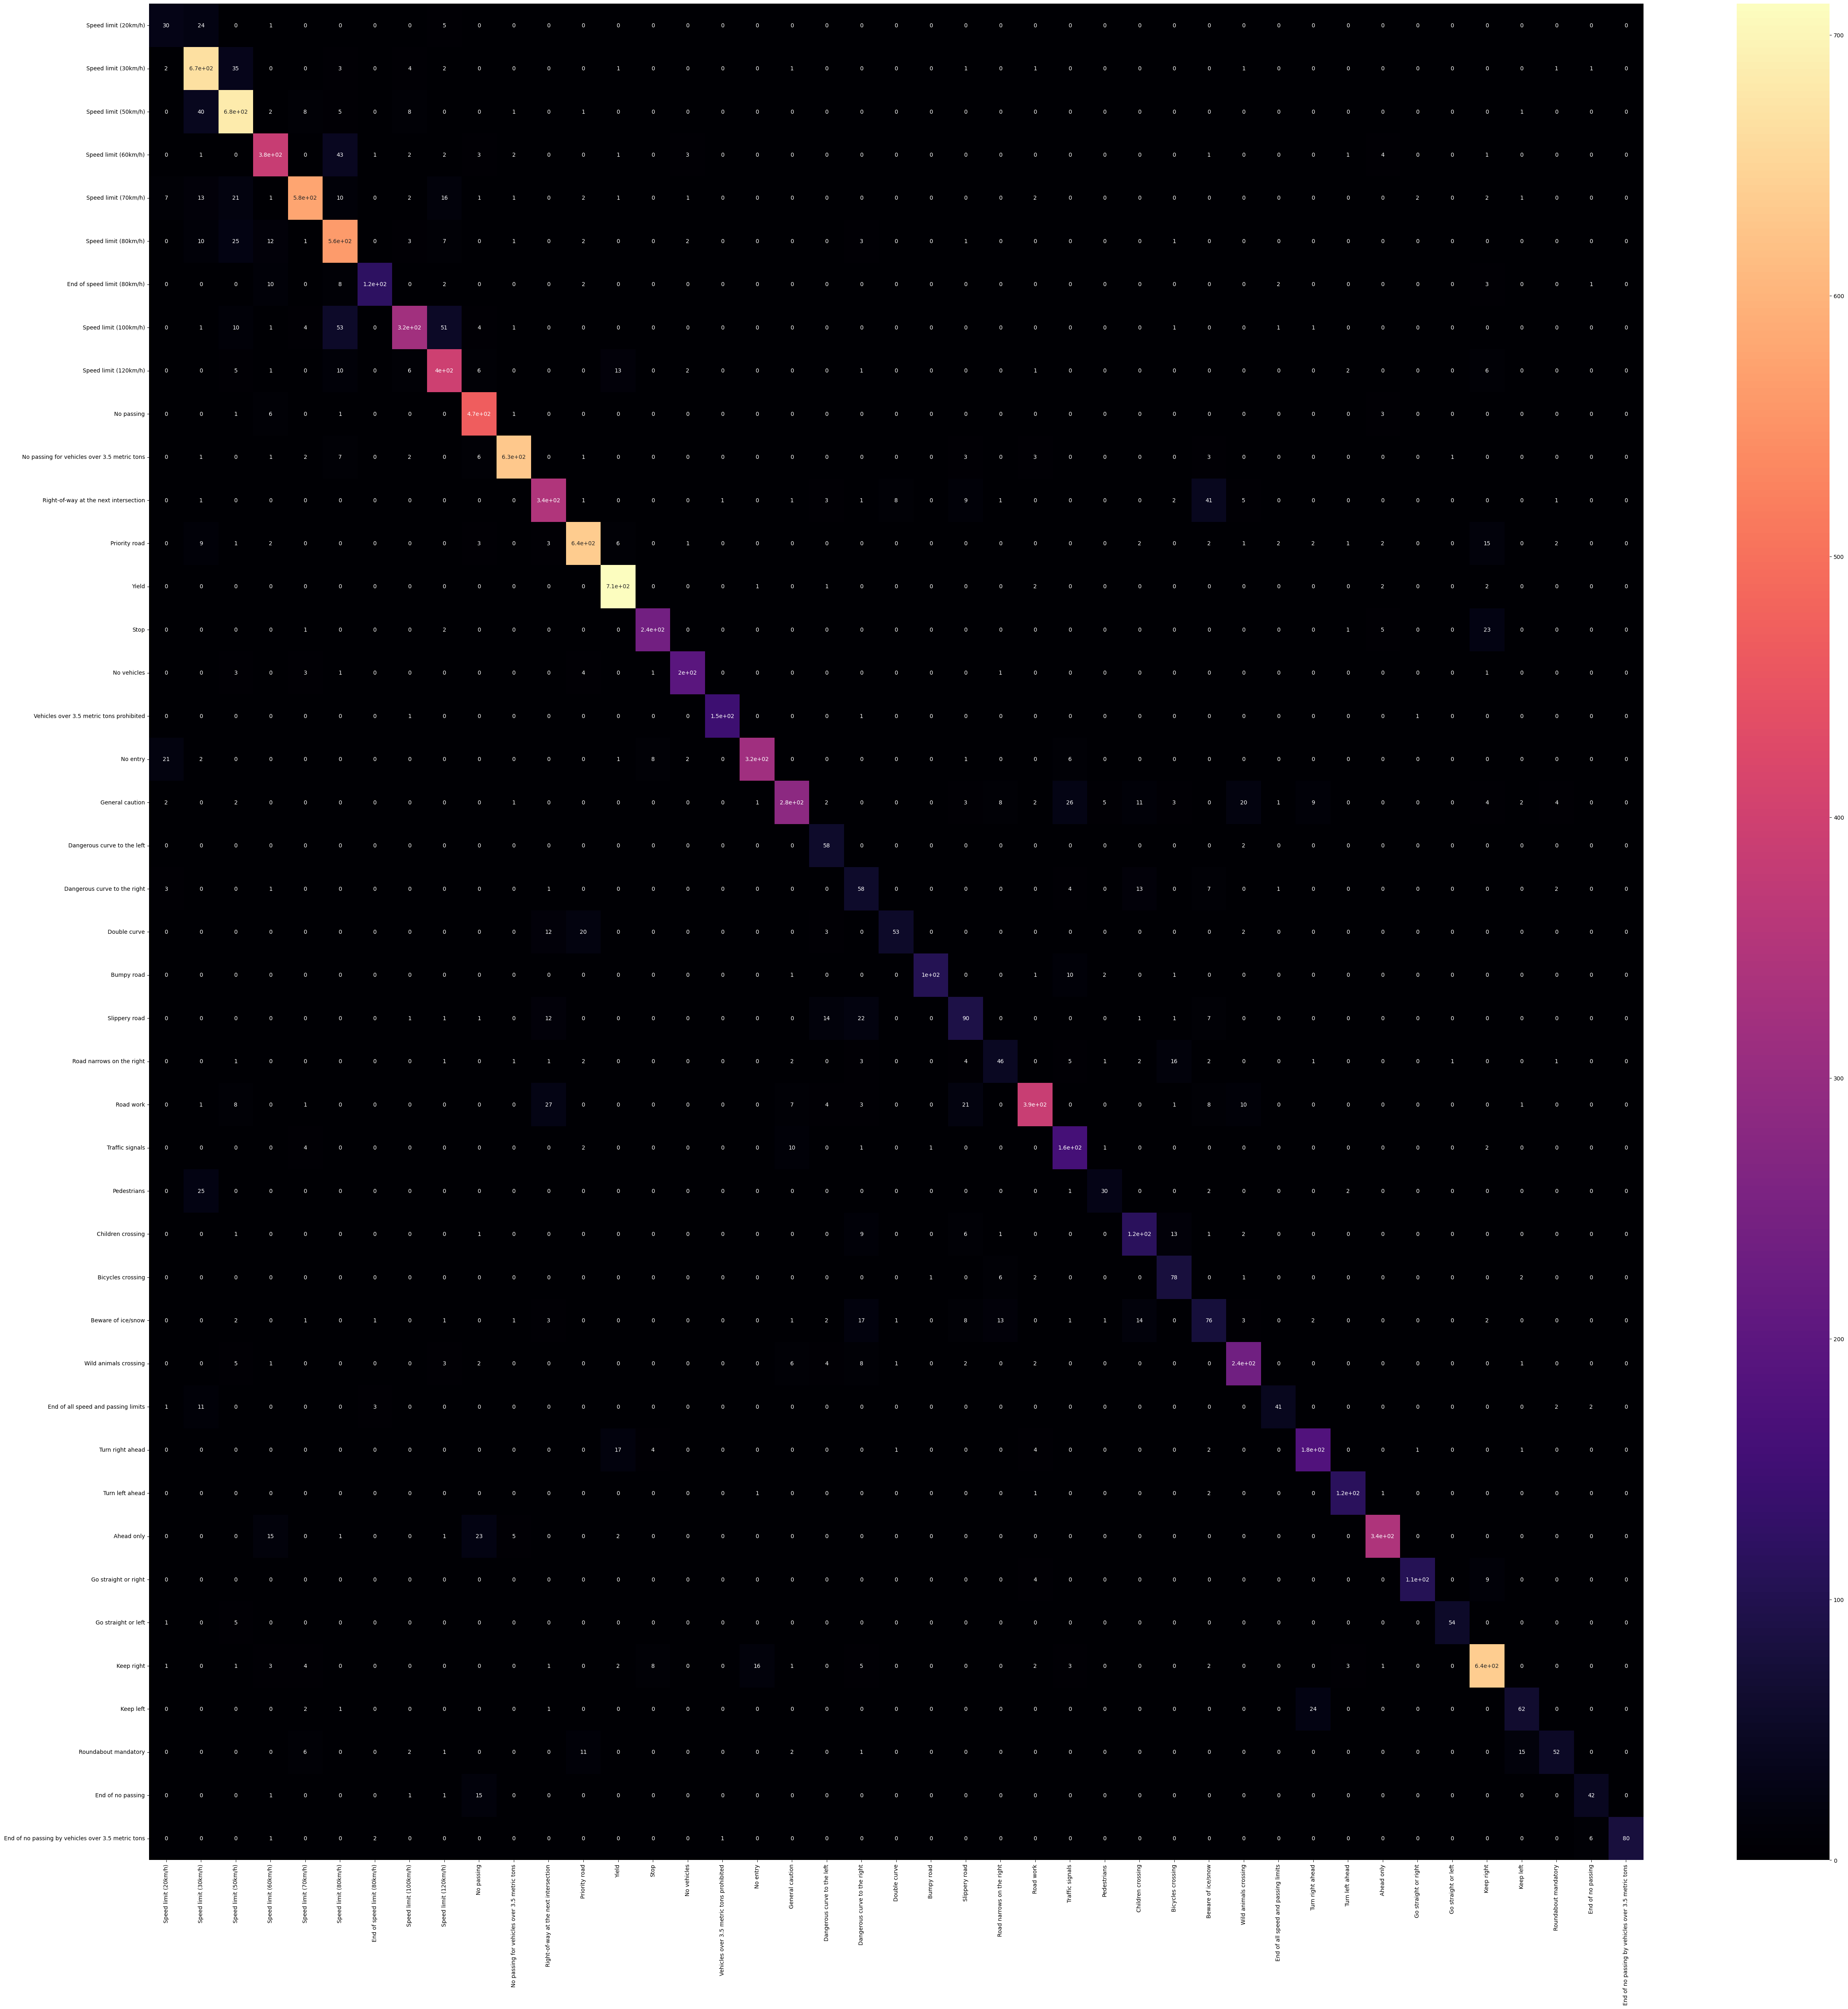

In [87]:
plt.figure(figsize=(60,60))
sns.heatmap(cm,xticklabels=classes,yticklabels=classes,cmap="magma",annot=True)

In [88]:
cr=classification_report(pred_classes,y_test,target_names=classes)
print(cr)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.50      0.44      0.47        68
                              Speed limit (30km/h)       0.93      0.83      0.87       806
                              Speed limit (50km/h)       0.91      0.84      0.88       810
                              Speed limit (60km/h)       0.86      0.87      0.86       444
                              Speed limit (70km/h)       0.87      0.94      0.91       614
                              Speed limit (80km/h)       0.89      0.80      0.84       705
                       End of speed limit (80km/h)       0.81      0.95      0.87       129
                             Speed limit (100km/h)       0.72      0.91      0.80       354
                             Speed limit (120km/h)       0.88      0.81      0.84       493
                                        No passing       0.97      0.88      0.

- **The accuracy is 86% and it can be improved by image augumentation**
-  **The model performs purely on minor classes**

## <h2 style="color:#F149; "> <strong>Model 2 : LeNet CNN + Data Augumentation<h2>

#### <h4 style="color:blue; ">Using Image Augumentation<h4>

**Data augmentation** is a technique used to increase the diversity of data without actually collecting new data. It involves creating modified versions of the original data by applying various transformations. This is particularly useful in machine learning, especially in tasks like image classification, natural language processing, or speech recognition, where having more data can improve model performance and generalization.

In image processing, data augmentation techniques might include:
- **Rotation**: Rotating images by a certain angle.
- **Flipping**: Horizontal or vertical flipping of images.
- **Cropping**: Randomly cropping sections of the image.
- **Scaling**: Zooming in or out of the image.
- **Translation**: Shifting the image in different directions.
- **Color Jittering**: Adjusting brightness, contrast, or saturation.

In text data, data augmentation might involve:
- **Synonym Replacement**: Replacing words with their synonyms.
- **Random Insertion**: Inserting random words into the text.
- **Back Translation**: Translating the text to another language and then translating it back to the original language.

The goal of data augmentation is to improve the robustness of machine learning models by exposing them to a wider variety of data scenarios.


In [89]:
unique,count=np.unique(ar=y_train,return_counts=True)
for i,j in zip(unique,count):
    print(i,j)

0 180
1 1980
2 2010
3 1260
4 1770
5 1650
6 360
7 1290
8 1260
9 1320
10 1800
11 1170
12 1890
13 1920
14 690
15 540
16 360
17 990
18 1080
19 180
20 300
21 270
22 330
23 450
24 240
25 1350
26 540
27 210
28 480
29 240
30 390
31 690
32 210
33 599
34 360
35 1080
36 330
37 180
38 1860
39 270
40 300
41 210
42 210


In [90]:
# classes which have very lee data in training 
low_count_classes=[]
for i,j in zip(unique,count):
    if j<=500:
        low_count_classes.append(i)
low_count_classes
# lets add more date for these classes

[0,
 6,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 27,
 28,
 29,
 30,
 32,
 34,
 36,
 37,
 39,
 40,
 41,
 42]

In [91]:
# Filter X_train and y_train for low count classes
low_count_X = X_train_gray[np.isin(y_train, low_count_classes)]
low_count_y = y_train[np.isin(y_train, low_count_classes)]

In [92]:
low_count_X.shape,low_count_y.shape

((6060, 32, 32, 1), (6060,))

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=30,           # Rotate images up to 30 degrees
    width_shift_range=0.05,       # Shift horizontally by up to 5%
    height_shift_range=0.05,      # Shift vertically by up to 5%
    shear_range=0.15,            # Shear transformation
    zoom_range=0.05,              # Zoom in/out by 5%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels
)

In [94]:
# Number of augmented samples to generate per image
augment_factor = 1  # 

# Storage for augmented images and labels
augmented_images = []
augmented_labels = []

In [95]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=30,           # Rotate images up to 30 degrees
    width_shift_range=0.05,       # Shift horizontally by up to 5%
    height_shift_range=0.05,      # Shift vertically by up to 5%
    shear_range=0.15,            # Shear transformation
    zoom_range=0.05,              # Zoom in/out by 5%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels
)# Number of augmented samples to generate per image
augment_factor = 2  # 

# Storage for augmented images and labels
augmented_images = []
augmented_labels = []
# Augment each image
for i in range(low_count_X.shape[0]):
    img = np.expand_dims(low_count_X[i], 0)  # Expand dims to match (1, 32, 32, 1)
    label = low_count_y[i]
    
    # Generate augmented images
    aug_iter = datagen.flow(img, batch_size=1)
    for _ in range(augment_factor):
        aug_img = next(aug_iter)[0]  # Get the next augmented image
        augmented_images.append(aug_img)
        augmented_labels.append(label)

# Convert to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [96]:
X_train_gray.shape,y_train.shape

((34799, 32, 32, 1), (34799,))

In [97]:
augmented_images.shape # odubled the dataset by 1 as(augement _factor is given 1 by us)

(12120, 32, 32, 1)

In [98]:
# Combine original and augmented data (optional)
x_augmented = np.concatenate((X_train_gray, augmented_images), axis=0)
y_augmented = np.concatenate((y_train, augmented_labels), axis=0)

In [101]:
x_augmented.shape,y_augmented.shape
# we have thrice the size of data for minor classes than the ones in original dataset
# lets train cnn on this

((46919, 32, 32, 1), (46919,))

In [102]:
# Cerating a cnn model
from tensorflow.keras import datasets, layers, models

LeNet_augmented = models.Sequential()

# Adding 1st Conv and 1st Pooling
LeNet_augmented.add(layers.Conv2D(6, (5, 5), activation="relu", input_shape=(32, 32, 1)))
LeNet_augmented.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Adding 2nd Conv and 2nd Pooling
LeNet_augmented.add(layers.Conv2D(16, (5, 5), activation="relu"))
LeNet_augmented.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten
LeNet_augmented.add(layers.Flatten())

# Add Fully connected Dense layer with 120 neurons
LeNet_augmented.add(layers.Dense(units=120, activation="relu"))

# Add 2nd Fully connected Dense layer with 84 neurons
LeNet_augmented.add(layers.Dense(units=84, activation="relu"))

# Add output layer with 43 neurons
LeNet_augmented.add(layers.Dense(units=43, activation="softmax"))


In [103]:
LeNet_augmented.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 43)                  │           3,655 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,511 (252.00 KB)

 Trainable params: 64,511 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
from tensorflow.keras.optimizers import Adam
optimizer1=Adam(learning_rate=0.001)

In [105]:
LeNet_augmented.compile(optimizer=optimizer1,loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [106]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop1=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [107]:
history1=LeNet_augmented.fit(x_augmented,y_augmented,batch_size=500,epochs=50,verbose=1,validation_data=(X_valid_gray,y_valid),callbacks=[early_stop1])

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1146 - loss: 3.4569 - val_accuracy: 0.4451 - val_loss: 1.9536
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5368 - loss: 1.6503 - val_accuracy: 0.6524 - val_loss: 1.1937
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6949 - loss: 1.0781 - val_accuracy: 0.7048 - val_loss: 0.9677
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7649 - loss: 0.8405 - val_accuracy: 0.7492 - val_loss: 0.8488
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8008 - loss: 0.7046 - val_accuracy: 0.7705 - val_loss: 0.7788
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8311 - loss: 0.6033 - val_accuracy: 0.8018 - val_loss: 0.7305
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8516 - loss: 0.5211 - val_accuracy: 0.7946 - val_loss: 0.7268
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8668 - loss: 0.4603 - val_accuracy: 0.8152 - v

Text(0.5, 1.0, ' Training Accuracy vs Validation Accuracy')

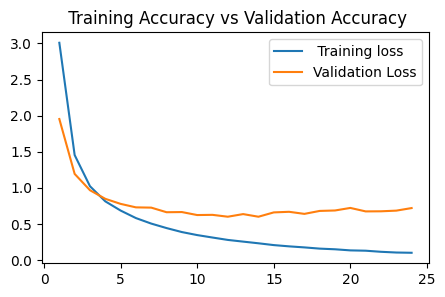

In [108]:
# plot accuracy vs validation accuracy
plt.figure(figsize=(5,3))
epochs=range(1,len(history1.history["accuracy"])+1)
plt.plot(epochs,history1.history['loss'],label=" Training loss")

plt.plot(epochs,history1.history[ 'val_loss'],label="Validation Loss")
plt.legend()
plt.title(" Training Accuracy vs Validation Accuracy")

---
**Inference**

---
- `Training loss:`decreased gradually at first and stabilized in the later as it has learned most of what it can learn
- `Validation loss:`decreased gradually at the start and after that it follows the zig zag pattern .The model isnt generalizing well on unseen data
- The model is overfitting as it performs well on the training set but non on validation set
- The validation and training loss has not converged  and the gap between them is high indicating overfiting and the improbements in the model

In [149]:
loss2,accuracy2=LeNet_augmented.evaluate(X_test_gray,y_test)
loss2,accuracy2

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8410 - loss: 0.8101


(0.8121393918991089, 0.8414093255996704)

#### <h4 style="color:blue; "> Prediction <h4>

In [151]:
# Predicted classes
pred1=LeNet_augmented.predict(X_test_gray)


pred_classes1 = np.argmax(pred1, axis=1)
pred_classes1

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [152]:
cm1=confusion_matrix(y_test,pred_classes1)
print(cm1)

[[  4  48   0 ...   0   0   0]
 [  1 692  16 ...   2   0   0]
 [  1  76 651 ...   0   0   0]
 ...
 [  0   2   0 ...  51   0   7]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  88]]


In [154]:
cr1=classification_report(pred_classes1,y_test,target_names=classes)
print(cr1)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.07      0.12      0.09        34
                              Speed limit (30km/h)       0.96      0.71      0.82       972
                              Speed limit (50km/h)       0.87      0.87      0.87       749
                              Speed limit (60km/h)       0.90      0.85      0.88       474
                              Speed limit (70km/h)       0.78      0.96      0.86       536
                              Speed limit (80km/h)       0.80      0.84      0.82       593
                       End of speed limit (80km/h)       0.67      0.88      0.76       113
                             Speed limit (100km/h)       0.78      0.89      0.83       394
                             Speed limit (120km/h)       0.85      0.84      0.84       455
                                        No passing       0.90      0.98      0.

**It has an overall accuracy of 85% and performs like the first model**

## <h2 style="color:#F149; "> <strong>Model 3 :  CNN Model(Hyperparameter Tuning)<h2>

**As the two models above are overfitiing , we will use hyperparameter tunings**
- Regularization 
- Drop out
- Batch Normalization
- Call Backs

#### <h4 style="color:blue; "> Data Preparation<h4>

In [111]:
# we will b using rgb data instead of gray 

In [112]:
# Normalizing the data by dividing with 255
X_train_norm = (X_train)/255
X_valid_norm = (X_valid)/255
X_test_norm  = (X_test)/255
X_train_norm.shape,X_test_norm.shape,X_valid_norm.shape

((34799, 32, 32, 3), (12630, 32, 32, 3), (4410, 32, 32, 3))

#### <h4 style="color:blue; ">Build a Model<h4>

In [113]:
from tensorflow.keras import layers, models, regularizers

# CNN Model 1 
cnn_model_1 = models.Sequential()

# Adding 1st Conv and Pooling
cnn_model_1.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)))
cnn_model_1.add(layers.BatchNormalization())  # Batch normalization
cnn_model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(layers.Dropout(0.25))

# Adding 2nd Conv and Pooling
cnn_model_1.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_1.add(layers.BatchNormalization())  # Batch normalization
cnn_model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(layers.Dropout(0.25))

# Adding 3rd Conv and Pooling
cnn_model_1.add(layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_1.add(layers.BatchNormalization())  # Batch normalization
cnn_model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(layers.Dropout(0.25))

# Flatten layer
cnn_model_1.add(layers.Flatten())

# Fully connected Dense layer with 256 neurons
cnn_model_1.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_1.add(layers.Dropout(0.5))

# Fully connected Dense layer with 128 neurons
cnn_model_1.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_1.add(layers.Dropout(0.5))

# Output layer with 43 neurons (assuming 43 classes for classification)
cnn_model_1.add(layers.Dense(43, activation="softmax"))

# Compile the model
cnn_model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Summary of the model
cnn_model_1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,915 (1.01 MB)

 Trainable params: 263,467 (1.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop1=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [115]:
history3=cnn_model_1.fit(X_train_norm,y_train,batch_size=500,epochs=200,verbose=1,validation_data=(X_valid_norm,y_valid),callbacks=[early_stop1])

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 0.0773 - loss: 9.8765 - val_accuracy: 0.0655 - val_loss: 7.1732
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.3280 - loss: 5.5241 - val_accuracy: 0.0546 - val_loss: 5.5293
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - accuracy: 0.5737 - loss: 3.0362 - val_accuracy: 0.0426 - val_loss: 4.6155
Epoch 4/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.8131 - loss: 1.6783 - val_accuracy: 0.0914 - val_loss: 3.9341
Epoch 5/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 309ms/step - accuracy: 0.9015 - loss: 1.1131 - val_accuracy: 0.1195 - val_loss: 3.6089
Epoch 6/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 311ms/step - accuracy: 0.9337 - loss: 0.8367 - val_accuracy: 0.2798 - val_loss: 2.8941
Epoch 7/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.9501 - loss: 0.6924 - val_accuracy: 0.4909 - val_loss: 2.1441
Epoch 8/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.9584 - loss: 0.6034 - 

Text(0.5, 1.0, ' Training Accuracy vs Validation Accuracy')

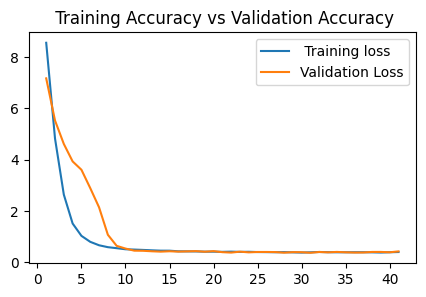

In [117]:
# plot accuracy vs validation accuracy
plt.figure(figsize=(5,3))
epochs=range(1,len(history3.history["accuracy"])+1)
plt.plot(epochs,history3.history['loss'],label=" Training loss")

plt.plot(epochs,history3.history[ 'val_loss'],label="Validation Loss")
plt.legend()
plt.title(" Training Accuracy vs Validation Accuracy")

---
**Inference**

---
- `Training loss:`decreased gradually at first and stabilized in the later as it has learned most of what it can learn
- `Validation loss:`decreased gradually at the start and after that it stabilizes .The model is generalizing well on unseen data
- The model performs well on the validation set better when compared to training set
- The validation and training loss has  converged  indicating a good fit for further predictions

#### <h4 style="color:blue; "> Predictions<h4>

In [155]:
loss3,accuracy3=cnn_model_1.evaluate(X_test_norm,y_test)
loss3,accuracy3

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9666 - loss: 0.4150


(0.41354846954345703, 0.9682502150535583)

In [156]:
# Predicted classes
pred3=cnn_model_1.predict(X_test_norm)


pred_classes3 = np.argmax(pred3, axis=1)
pred_classes3

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [157]:
cm3=confusion_matrix(y_test,pred_classes3)
print(cm3)

[[ 55   0   0 ...   0   0   0]
 [  0 710   0 ...   0   0   0]
 [  0   7 740 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  89]]


In [159]:
cr3=classification_report(pred_classes3,y_test,target_names=classes)
print(cr3)


                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.92      1.00      0.96        55
                              Speed limit (30km/h)       0.99      0.98      0.98       727
                              Speed limit (50km/h)       0.99      0.99      0.99       747
                              Speed limit (60km/h)       0.96      0.99      0.97       433
                              Speed limit (70km/h)       0.98      0.99      0.98       652
                              Speed limit (80km/h)       1.00      0.90      0.94       697
                       End of speed limit (80km/h)       0.92      0.99      0.96       139
                             Speed limit (100km/h)       0.98      1.00      0.99       443
                             Speed limit (120km/h)       0.94      0.97      0.96       437
                                        No passing       1.00      0.98      0.

**We have avoided overfitiing by hyperparameter tuing and the overall acuuracy is 97% but performs poorly on the minor data class labels `(Pedestrians,End of passing )`**
<br>It might be becaus they have the less the data in the tarining set and lets do image augumentation for the classes  which have less than 500 samples in the dataset

## <h2 style="color:#F149; "> <strong>Model 4 :  CNN + Data Augumentation<h2>

#### <h4 style="color:blue; "> Data augumentation for the minor classes<h4>

In [125]:
unique,count=np.unique(ar=y_train,return_counts=True)
for i,j in zip(unique,count):
    print(i,j,"  ",traffic_signs[i])

0 180    Speed limit (20km/h)
1 1980    Speed limit (30km/h)
2 2010    Speed limit (50km/h)
3 1260    Speed limit (60km/h)
4 1770    Speed limit (70km/h)
5 1650    Speed limit (80km/h)
6 360    End of speed limit (80km/h)
7 1290    Speed limit (100km/h)
8 1260    Speed limit (120km/h)
9 1320    No passing
10 1800    No passing for vehicles over 3.5 metric tons
11 1170    Right-of-way at the next intersection
12 1890    Priority road
13 1920    Yield
14 690    Stop
15 540    No vehicles
16 360    Vehicles over 3.5 metric tons prohibited
17 990    No entry
18 1080    General caution
19 180    Dangerous curve to the left
20 300    Dangerous curve to the right
21 270    Double curve
22 330    Bumpy road
23 450    Slippery road
24 240    Road narrows on the right
25 1350    Road work
26 540    Traffic signals
27 210    Pedestrians
28 480    Children crossing
29 240    Bicycles crossing
30 390    Beware of ice/snow
31 690    Wild animals crossing
32 210    End of all speed and passing limits

In [126]:
# classes which have very lee data in training 
low_count_classes=[]
for i,j in zip(unique,count):
    if j<=500:
        low_count_classes.append(i)
# low_count_classes
# lets add more date fro these classes

In [127]:
import numpy as np

# Filter X_train and y_train for low count classes
low_count_X = X_train_norm[np.isin(y_train, low_count_classes)]
low_count_y = y_train[np.isin(y_train, low_count_classes)]


In [128]:
low_count_X.shape,low_count_y.shape

((6060, 32, 32, 3), (6060,))

In [130]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Initialize ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,           # Rotate images up to 20 degrees
    width_shift_range=0.05,      # Shift horizontally by up to 5%
    height_shift_range=0.05,     # Shift vertically by up to 5%
    shear_range=0.15,            # Shear transformation
    zoom_range=0.05,             # Zoom in/out by 5%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels
)

# Number of augmented samples to generate per image
augment_factor = 2  

# Storage for augmented images and labels
augmented_images = []
augmented_labels = []

# Augment each image
for i in range(low_count_X.shape[0]):  # Iterate over each image in low_count_X
    img = np.expand_dims(low_count_X[i], 0)  # Expand dims to match (1, 32, 32, 3)
    label = low_count_y[i]
    
    # Generate augmented images
    aug_iter = datagen.flow(img, batch_size=1)
    for _ in range(augment_factor):
        aug_img = next(aug_iter)[0]  # Get the next augmented image
        augmented_images.append(aug_img)
        augmented_labels.append(label)

# Convert to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Check the shape of the augmented data
print(f"Augmented images shape: {augmented_images.shape}")
print(f"Augmented labels shape: {augmented_labels.shape}")


Augmented images shape: (12120, 32, 32, 3)
Augmented labels shape: (12120,)


In [132]:
# Combine original and augmented data (optional)
x_augmented_2 = np.concatenate((X_train_norm, augmented_images), axis=0)
y_augmented_2= np.concatenate((y_train, augmented_labels), axis=0)
X_train_norm.shape,y_train.shape,x_augmented_2.shape,y_augmented_2.shape


((34799, 32, 32, 3), (34799,), (46919, 32, 32, 3), (46919,))

#### <h4 style="color:blue; ">Bulid the model<h4>

In [133]:
from tensorflow.keras import layers, models, regularizers

# CNN Model 3
cnn_model_3 = models.Sequential()

# Adding 1st Conv and Pooling
cnn_model_3.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)))
cnn_model_3.add(layers.BatchNormalization())  # Batch normalization
cnn_model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(layers.Dropout(0.25))

# Adding 2nd Conv and Pooling
cnn_model_3.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_3.add(layers.BatchNormalization())  # Batch normalization
cnn_model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(layers.Dropout(0.25))

# Adding 3rd Conv and Pooling
cnn_model_3.add(layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_3.add(layers.BatchNormalization())  # Batch normalization
cnn_model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model_3.add(layers.Dropout(0.25))

# Flatten layer
cnn_model_3.add(layers.Flatten())

# Fully connected Dense layer with 256 neurons
cnn_model_3.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_3.add(layers.Dropout(0.5))

# Fully connected Dense layer with 128 neurons
cnn_model_3.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
cnn_model_3.add(layers.Dropout(0.5))

# Output layer with 43 neurons (assuming 43 classes for classification)
cnn_model_3.add(layers.Dense(43, activation="softmax"))

# Compile the model
cnn_model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Summary of the model
cnn_model_3.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,915 (1.01 MB)

 Trainable params: 263,467 (1.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [134]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop1=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [135]:
history5=cnn_model_3.fit(x_augmented_2,y_augmented_2,batch_size=500,epochs=200,verbose=1,validation_data=(X_valid_norm,y_valid),callbacks=[early_stop1])

Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.0654 - loss: 9.6325 - val_accuracy: 0.0746 - val_loss: 6.4702
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.3187 - loss: 4.6275 - val_accuracy: 0.0800 - val_loss: 4.8670
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 231ms/step - accuracy: 0.6677 - loss: 2.1840 - val_accuracy: 0.1866 - val_loss: 3.9344
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 295ms/step - accuracy: 0.8401 - loss: 1.2973 - val_accuracy: 0.4016 - val_loss: 3.0123
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 289ms/step - accuracy: 0.8925 - loss: 0.9712 - val_accuracy: 0.6900 - val_loss: 1.7307
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 301ms/step - accuracy: 0.9138 - loss: 0.8238 - val_accuracy: 0.8519 - val_loss: 1.0672
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 296ms/step - accuracy: 0.9296 - loss: 0.7335 - val_accuracy: 0.9270 - val_loss: 0.7174
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 270ms/step - accuracy: 0.9341 - loss: 0.6850 - 

Text(0.5, 1.0, ' Training Accuracy vs Validation Accuracy')

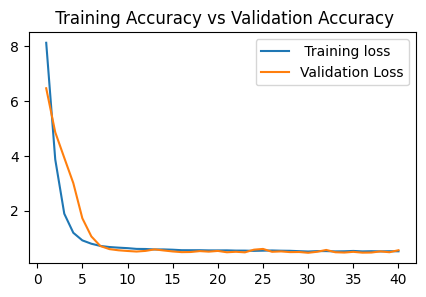

In [136]:
# plot accuracy vs validation accuracy
plt.figure(figsize=(6,3))
epochs=range(1,len(history5.history["accuracy"])+1)
plt.plot(epochs,history5.history['loss'],label=" Training loss")

plt.plot(epochs,history5.history[ 'val_loss'],label="Validation Loss")
plt.legend()
plt.title(" Training Accuracy vs Validation Accuracy")

#### <h4 style="color:blue; ">Predictions<h4>

In [160]:
loss4,accuracy4=cnn_model_3.evaluate(X_test_norm,y_test)
loss4,accuracy4

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9623 - loss: 0.5002


(0.49982818961143494, 0.9610451459884644)

In [161]:
# Predicted classes
pred5=cnn_model_3.predict(X_test_norm)


pred_classes5 = np.argmax(pred5, axis=1)
pred_classes5

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [162]:
cm5=confusion_matrix(y_test,pred_classes5)
print(cm5)

[[ 60   0   0 ...   0   0   0]
 [  2 708   5 ...   0   0   0]
 [  0   2 747 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  90]]


In [163]:
cr5=classification_report(pred_classes5,y_test,target_names=classes)
print(cr5)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.92      0.96        65
                              Speed limit (30km/h)       0.98      0.99      0.99       713
                              Speed limit (50km/h)       1.00      0.96      0.98       780
                              Speed limit (60km/h)       0.89      1.00      0.94       400
                              Speed limit (70km/h)       0.97      0.98      0.98       651
                              Speed limit (80km/h)       0.97      0.93      0.95       659
                       End of speed limit (80km/h)       0.99      0.98      0.98       151
                             Speed limit (100km/h)       0.98      0.98      0.98       448
                             Speed limit (120km/h)       0.99      0.97      0.98       457
                                        No passing       1.00      0.97      0.

**Overall Perforamnce is 96% and it does not perform better than that of the above model**


## <h2 style="color:#F149; "> <strong>All Models Summary<h2>

In [180]:
Summary={
    "Model":["Lenet","Lenet+Aug","CNN+hyp","CNN+hyp+Aug"],
    "Loss":np.round([loss1,loss2,loss3,loss4],2),
    "Accuracy":np.round([accuracy1,accuracy2,accuracy3,accuracy4],2)
}
summary=pd.DataFrame(Summary).set_index("Model")
summary


,Loss,Accuracy
Model,,
Lenet,0.78,0.87
Lenet+Aug,0.81,0.84
CNN+hyp,0.41,0.97
CNN+hyp+Aug,0.50,0.96


---
**Inference:**

---
- After comparing the all models performance, we will go with model `{cnn_model_1}` as it has the highest accuracy of `97%`
- Below are the Confusion matrix and Classificatio reports of different matrices

In [145]:
print(cm,"\n",cr)

[[ 30  24   0 ...   0   0   0]
 [  2 667  35 ...   1   1   0]
 [  0  40 684 ...   0   0   0]
 ...
 [  0   0   0 ...  52   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   6  80]] 
                                                     precision    recall  f1-score   support

                              Speed limit (20km/h)       0.50      0.44      0.47        68
                              Speed limit (30km/h)       0.93      0.83      0.87       806
                              Speed limit (50km/h)       0.91      0.84      0.88       810
                              Speed limit (60km/h)       0.86      0.87      0.86       444
                              Speed limit (70km/h)       0.87      0.94      0.91       614
                              Speed limit (80km/h)       0.89      0.80      0.84       705
                       End of speed limit (80km/h)       0.81      0.95      0.87       129
                             Speed limit (100km/h)       0.72      0.

In [170]:
print(cm1,"\n",cr1)

[[  4  48   0 ...   0   0   0]
 [  1 692  16 ...   2   0   0]
 [  1  76 651 ...   0   0   0]
 ...
 [  0   2   0 ...  51   0   7]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  88]] 
                                                     precision    recall  f1-score   support

                              Speed limit (20km/h)       0.07      0.12      0.09        34
                              Speed limit (30km/h)       0.96      0.71      0.82       972
                              Speed limit (50km/h)       0.87      0.87      0.87       749
                              Speed limit (60km/h)       0.90      0.85      0.88       474
                              Speed limit (70km/h)       0.78      0.96      0.86       536
                              Speed limit (80km/h)       0.80      0.84      0.82       593
                       End of speed limit (80km/h)       0.67      0.88      0.76       113
                             Speed limit (100km/h)       0.78      0.

In [172]:
print(cm3,"\n",cr3)

[[ 55   0   0 ...   0   0   0]
 [  0 710   0 ...   0   0   0]
 [  0   7 740 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  44   0]
 [  0   0   0 ...   0   0  89]] 
                                                     precision    recall  f1-score   support

                              Speed limit (20km/h)       0.92      1.00      0.96        55
                              Speed limit (30km/h)       0.99      0.98      0.98       727
                              Speed limit (50km/h)       0.99      0.99      0.99       747
                              Speed limit (60km/h)       0.96      0.99      0.97       433
                              Speed limit (70km/h)       0.98      0.99      0.98       652
                              Speed limit (80km/h)       1.00      0.90      0.94       697
                       End of speed limit (80km/h)       0.92      0.99      0.96       139
                             Speed limit (100km/h)       0.98      1.

In [173]:
print(cm5,"\n",cr5)

[[ 60   0   0 ...   0   0   0]
 [  2 708   5 ...   0   0   0]
 [  0   2 747 ...   0   0   0]
 ...
 [  0   0   0 ...  86   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  90]] 
                                                     precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.92      0.96        65
                              Speed limit (30km/h)       0.98      0.99      0.99       713
                              Speed limit (50km/h)       1.00      0.96      0.98       780
                              Speed limit (60km/h)       0.89      1.00      0.94       400
                              Speed limit (70km/h)       0.97      0.98      0.98       651
                              Speed limit (80km/h)       0.97      0.93      0.95       659
                       End of speed limit (80km/h)       0.99      0.98      0.98       151
                             Speed limit (100km/h)       0.98      0.

#### <h4 style="color:blue; ">Visualizing the results<h4>
**We will read the signs using cnn_model_1**

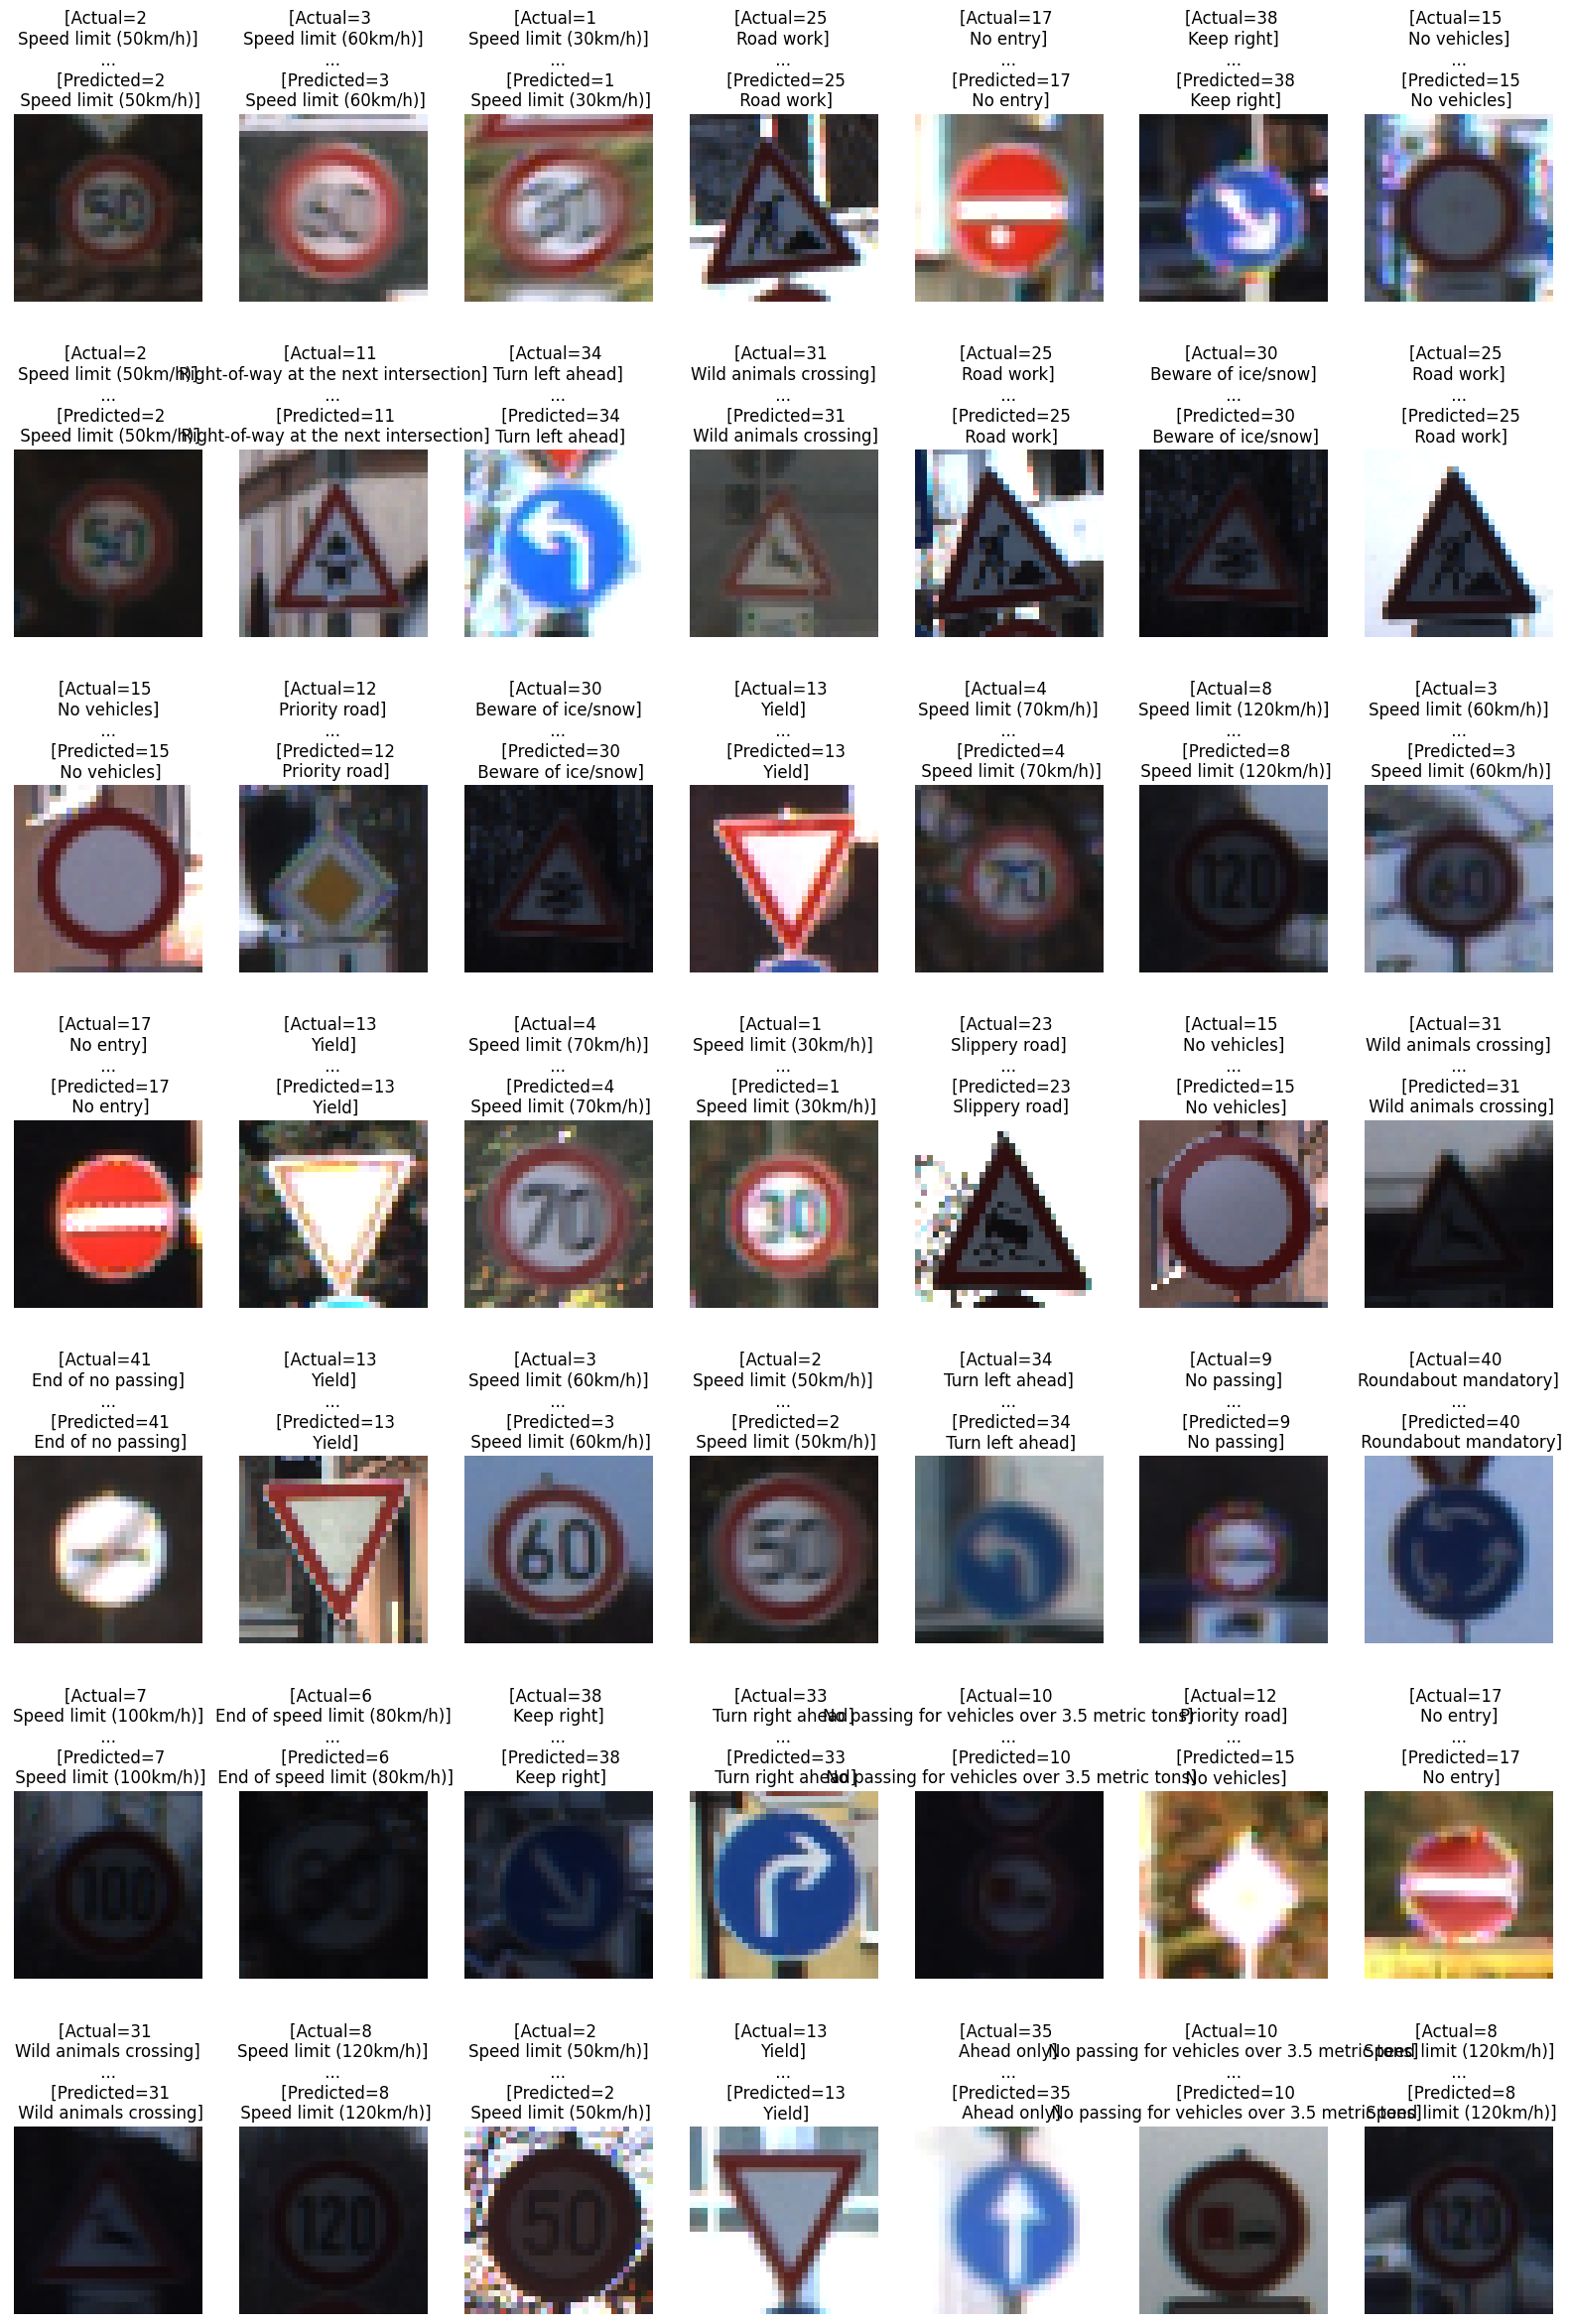

In [176]:
r=7
c=7
import random

fig,axes=plt.subplots(r,c,figsize=(20,30))

for i in range(r * c):
    z=random.randint(0,len(X_test_norm))
    axes[i//7,i%7].imshow(X_test_norm[z])
    axes[i//7,i%7].set_title(f"[Actual={y_test[z]} \n{traffic_signs[y_test[z]]}]\n ... \n [Predicted={pred_classes3[z]}\n {traffic_signs[pred_classes3[z]]}]")
    axes[i//7,i%7].axis("off")

plt.savefig('Prediction.png', bbox_inches='tight')

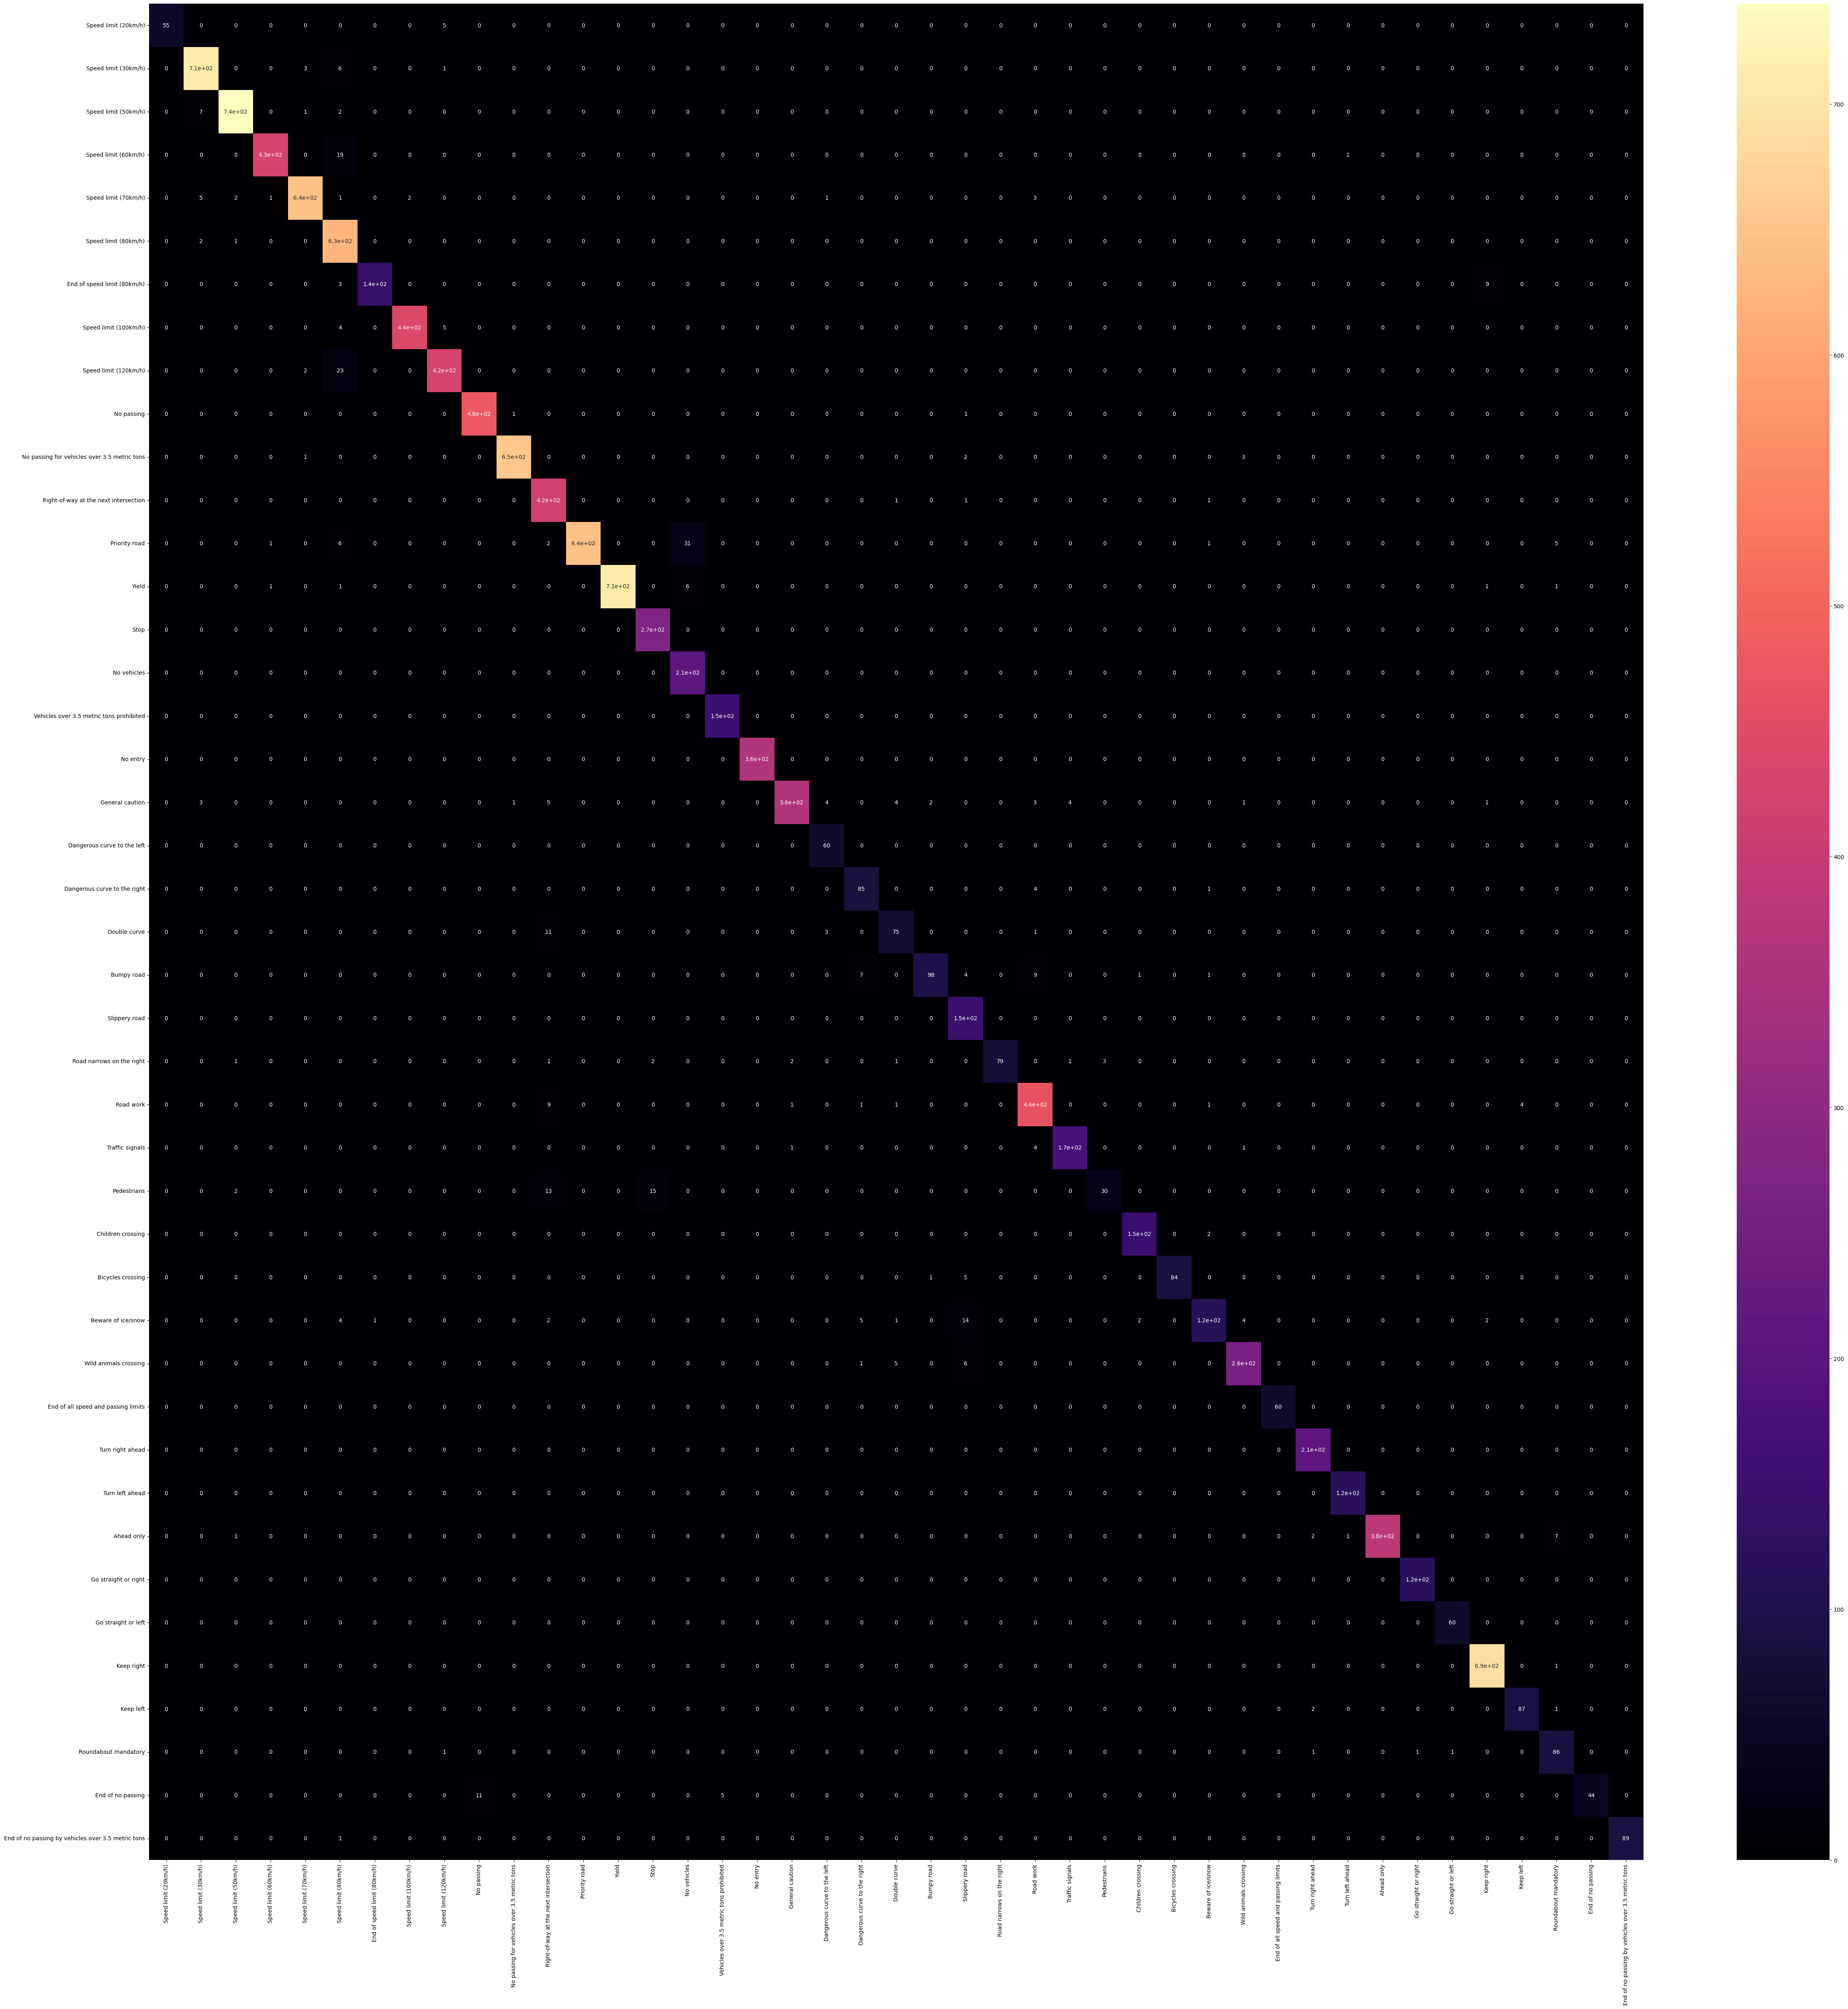

In [177]:
plt.figure(figsize=(60,60))
sns.heatmap(cm3,xticklabels=classes,yticklabels=classes,cmap="magma",annot=True)
plt.savefig('Heatmap CM.png', bbox_inches='tight')